In [49]:
'''分析ift+relax檔案 (0-7,10-17,18,19 vs.9)'''
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

err_Chrtime = [119, 934, 1062, 1341, 1354, 1467, 1858, 2097, 2220, 2227, 2243, 2479, 3376, 3484, 3485, 3750, 4294, 4375, 4383, 4873, 5324, 5766, 6918, 6935, 7119, 7611, 8363, 8955, 9120, 9515, 10055, 10083, 10177, 10191, 10342, 10390, 11527, 12168, 12849, 13317, 13557, 13853, 14121, 14222, 14618, 16676, 17079, 18105, 18193, 18584, 18626, 18814, 19038, 19107, 19287, 19527, 19663, 19669, 20254, 20742, 21440, 21614, 21719, 21804, 21961, 21963, 23175, 23348, 23948, 24152, 24388, 24397, 24410, 25981, 26001]

txt = r"C:\Users\Chun-Po\Documents\Python Scripts\儲存分析結果(數據)\反曲點2+弛豫.csv"
data = np.genfromtxt(txt, dtype = None, delimiter = ',', skip_header = 0, filling_values = 0, invalid_raise = False, encoding = 'latin-1')
[Row,Column] = data.shape
variable = [0,1,2,3,4,5,6,7,10,11,12,13,14,15,16,17,18,19];     # 出廠前:[8,13,16,17,18,19,20,21,22,23,30,32,33,34,35]；回廠後:[42,47,50,51,52,53,54,55,56,57,64,66,67,68,69]
Variable = ['01 sec(前)','10 sec(前)','30 sec(前)','01 min(前)','03 min(前)','05 min(前)','07 min(前)','10 min(前)','01 sec(後)','10 sec(後)','30 sec(後)','01 min(後)','03 min(後)','05 min(後)','07 min(後)','10 min(後)','ift(前)','ift(後)']
item = []; sample = []; remove = []; R_feature = [];
for i in range(len(variable)):
    feature = data[1:,variable[i]]; soh = data[1:,9]; row = len(feature)
    if i<16:
        err_feature = [w for w,x in enumerate(feature) if x>-0.002]
    else:
        err_feature = [w for w,x in enumerate(feature) if x==0 or x==2500]     # 刪掉無數據(nan)或數據=0的
    err = sorted(set(err_Chrtime+err_feature))
    feature_ok = np.delete(feature[:], err).astype(np.float32); soh_ok = np.delete(soh[:], err).astype(np.float32);
    R = np.corrcoef(feature_ok, soh_ok)[0,1]; R_sq = np.round(R*R,3)     # 相關性分析
    item.append(Variable[i]); sample.append(len(soh_ok)); R_feature.append(R_sq);
    removed = len(soh_ok)-27064; remove.append(removed)     # 算有效數據占比

file = np.asarray([item,sample,remove,R_feature]).T
np.savetxt(r'C:\Users\Chun-Po\Documents\Python Scripts\儲存分析結果(數據)\進出廠ift+relax分析結果.csv',file,fmt='%s',delimiter=',')
Table = pd.DataFrame(file, columns = ['變數','樣本數','剔除的樣本','相關性(R^2)'])
Table.style.set_properties(**{'text-align': 'middle'})


,變數,樣本數,剔除的樣本,相關性(R^2)
0,01 sec(前),26988,-76,0.001
1,10 sec(前),26988,-76,0.029
2,30 sec(前),26988,-76,0.094
3,01 min(前),26988,-76,0.145
4,03 min(前),26988,-76,0.213
5,05 min(前),26988,-76,0.136
6,07 min(前),26988,-76,0.155
7,10 min(前),26988,-76,0.283
8,01 sec(後),26934,-130,0.074
9,10 sec(後),26934,-130,0.364


In [43]:
'''分析796檔案 (42,47,48,50-57,64,66-69)'''
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

txt = r"C:\Users\Chun-Po\Documents\Python Scripts\儲存分析結果(數據)\合併796檔案(raw).csv"
data = np.genfromtxt(txt, dtype = None, delimiter = ',', skip_header = 0, filling_values = 0, invalid_raise = False, encoding = 'latin-1')
[Row,Column] = data.shape
# print(data[1:,2]); print(type(data[1:,2]))
variable = [42,47,50,51,52,53,54,55,56,57,64,66,67,68,69];     # 出廠前:[8,13,16,17,18,19,20,21,22,23,30,32,33,34,35]；回廠後:[42,47,50,51,52,53,54,55,56,57,64,66,67,68,69]
Variable = ['DIS0_wh','CHR_Time','V15','V20','V25','V30','V35','DIS0_Time','RV10','VDT','Time','VPVD','TptE','VEOC','VDmax']
item = []; sample = []; portion = []; R_feature = [];
for i in range(len(variable)):
    feature = data[1:,variable[i]]; soh = data[1:,48]; chrtime = data[1:,47]; row = len(feature)
    no_nan = np.empty((1,row), dtype = object);
    for h in range(row):          # 把feature中有nan的都換成0
        no_nan[0,h] = feature[h].replace('nan', '0')
    number = np.empty((1,row), dtype = object); SOH = np.empty((1,row), dtype = object); Chrtime = np.empty((1,row), dtype = object);
    for j in range(row):          # 把字串全部轉成數字
        number[0,j] = float(no_nan[0][j]); SOH[0,j] = float(soh[j])*156; Chrtime[0,j] = np.round(float(chrtime[j])*86400,1)
    err_Chrtime = [u for u,v in enumerate(Chrtime[0]) if v<50]     # 刪掉充電時間過短的(<50秒)
    err_number = [w for w,x in enumerate(number[0]) if x==0]     # 刪掉無數據(nan)或數據=0的
    err = sorted(set(err_Chrtime+err_number))
    number_ok = np.delete(number[:], err).astype(np.float32); SOH_ok = np.delete(SOH[:], err).astype(np.float32);
    R = np.corrcoef(number_ok, SOH_ok)[0,1]; R_sq = np.round(R*R,3)     # 相關性分析
    item.append(Variable[i]); sample.append(len(SOH_ok)); R_feature.append(R_sq);
    used = str(np.round(len(SOH_ok)*100/27064,1)) + '%'; portion.append(used)     # 算有效數據占比

print("err_Chrtime = \n",err_Chrtime); print('共有'+ str(len(err_Chrtime)) +'個modules充電有問題')
file = np.asarray([item,sample,portion,R_feature]).T
np.savetxt(r'C:\Users\Chun-Po\Documents\Python Scripts\儲存分析結果(數據)\回廠796分析結果.csv',file,fmt='%s',delimiter=',')
Table = pd.DataFrame(file, columns = ['變數','樣本數','佔總體(%)','相關性(R^2)'])
Table.style.set_properties(**{'text-align': 'middle'})


err_Chrtime = 
 [119, 934, 1062, 1341, 1354, 1467, 1858, 2097, 2220, 2227, 2243, 2479, 3376, 3484, 3485, 3750, 4294, 4375, 4383, 4873, 5324, 5766, 6918, 6935, 7119, 7611, 8363, 8955, 9120, 9515, 10055, 10083, 10177, 10191, 10342, 10390, 11527, 12168, 12849, 13317, 13557, 13853, 14121, 14222, 14618, 16676, 17079, 18105, 18193, 18584, 18626, 18814, 19038, 19107, 19287, 19527, 19663, 19669, 20254, 20742, 21440, 21614, 21719, 21804, 21961, 21963, 23175, 23348, 23948, 24152, 24388, 24397, 24410, 25981, 26001]
共有75個modules充電有問題


,變數,樣本數,佔總體(%),相關性(R^2)
0,DIS0_wh,26986,99.7%,0.885
1,CHR_Time,26989,99.7%,0.968
2,V15,25908,95.7%,0.901
3,V20,23203,85.7%,0.937
4,V25,18631,68.8%,0.846
5,V30,12009,44.4%,0.585
6,V35,4591,17.0%,0.275
7,DIS0_Time,26989,99.7%,0.89
8,RV10,26989,99.7%,0.402
9,VDT,26979,99.7%,0.276


In [142]:
'''New_反曲點+弛豫分析(0818)'''
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

rx00 = []; rx001 = []; rx003 = []; rx01 = []; rx03 = []; rx05 = []; rx07 = []; rx09 = []; rx10 = []; inf = []; SOH = []; Module = []; R_r = []
rx00T = []; rx001T = []; rx003T = []; rx01T = []; rx03T = []; rx05T = []; rx07T = []; rx09T = []; rx10T = []; infT = [];

for dirpath, dirnames, filenames in os.walk(r"C:\Users\Chun-Po\Documents\Python Scripts\B&A to NTU"):
    for f in filenames:
        a = os.path.join(dirpath,f)
        if os.path.isfile(a):     #判斷是否是檔案,是檔案才打開
            if 'csv' in a:
                try:
                    data = np.genfromtxt(a, dtype = None, delimiter = ',', skip_header = 0, filling_values = 0, usecols=np.arange(0,4), invalid_raise = False, encoding = 'latin-1')
                    [Row,Column] = data.shape
                    dat_r = np.round(data[4:,2].astype(np.float64),1)     # 把'安培'四捨五入
                # inflection analysis
                    A = np.where(dat_r == 6.5); a1 = A[0];
                    Cha = data[4:,0][a1].astype(np.float64);                    # Charge time;
                    vot = data[4:,1][a1].astype(np.float64);                    # Voltage
                    Dis = data[4:,0][a1[-1]+602:-1];                            # Discharge time                    
                    b = np.polyfit(Cha, vot, 10); y = np.poly1d(b); v = y(Cha);
                    dv1 = np.gradient(v, Cha); dv2 = np.gradient(dv1, Cha);
                    pts = np.where(dv2[1:]*dv2[0:-1]<0)[0];
                    pyd1 = dv1[pts];                                    # dV/dt value of inflection points
                    n = math.ceil(len(pts)*0.5); pyt = np.empty((1,n), dtype = object);
                    if len(pts) == 0:
                        ift = 2500
                    elif (len(pts)%2) == 0:                # 反曲點為偶數個
                        for i in range(n):
                            pyt[0,i] = pyd1[i*2+1]-pyd1[i*2]
                        pos = np.argmax(pyt);
                        ift = pts[pos*2];
                    else:                # 反曲點為奇數個
                        pts_adj = [];
                        for i in range(n):     # 加入充電結束時的時間
                            if Cha[-1]-180<len(a1):
                                ptss = pts.tolist(); ptss.append(Cha[-1])
                            else:
                                ptss = pts.tolist(); ptss.append(len(a1)-1); ptss = ptss+min(Cha)
                            ptsss = np.array(ptss).astype(np.int64);
                        for j in range(len(ptsss)):     # 求出實際的反曲點時間
                            try:
                                point = np.where(Cha == ptsss[j])[0][0]
                            except:
                                point = np.where(Cha == ptsss[j]-1)[0][0]
                            pts_adj.append(point)
                        pyd1 = dv1[pts_adj];
                        for k in range(n):
                            pyt[0,k] = pyd1[k*2+1]-pyd1[k*2]
                        pos = np.argmax(pyt);
                        if dv1[pts[pos*2]]>0:
                            ift = pts[pos*2]
                        else:
                            if len(pts) == 1:
                                ift = 2500
                            else:
                                ift = pts[(pos-1)*2]
                # Relaxation analysis                  
                    rx = np.where(abs(dat_r)<6);
                    rxp1 = np.where(rx[0][1:]-rx[0][0:-1]>10)[0];     # [rxp1[0]+1,rxp1[0]+181,rxp1[0]+301,rxp1[0]+421]
                    rxp2 = np.hstack([rxp1[0]+1,rxp1[0]+1,rxp1[0]+10,rxp1[0]+30,rxp1[0]+60,rxp1[0]+180,rxp1[0]+300,rxp1[0]+420,rxp1[1]-1,-1]);     # [0,rxp1[0],rxp1[0]+1,rxp1[1],-1]
                    rxp3 = rx[0][rxp2];          # 挑rest period的起始時間(連續的)
                    rxp4 = [rxp3[0]-1,rxp3[1],rxp3[2],rxp3[3],rxp3[4],rxp3[5],rxp3[6],rxp3[7],rxp3[8]]
                    rxv = data[4:,1][rxp4].astype(np.float64);                    # Relaxation voltage
                    rx00sec = np.round(rxv[1]-rxv[0],3)     # 看歐姆極化
                    rx10sec = np.round(rxv[2]-rxv[0],3)     # 極化10s
                    rx30sec = np.round(rxv[3]-rxv[0],3)     # 極化30s
                    rx01min = np.round(rxv[4]-rxv[0],3)     # 看01極化
                    rx03min = np.round(rxv[5]-rxv[0],3)     # 看03極化
                    rx05min = np.round(rxv[6]-rxv[0],3)     # 看05極化
                    rx07min = np.round(rxv[7]-rxv[0],3)     # 看07極化
                    rx10min = np.round(rxv[8]-rxv[0],3)     # 看10極化
                    soh = rxp3[9]-rxp3[8]
                except:
                    print(a + ' , 充電時間 : ' + str(len(Cha)))                        
                    rx00sec=0; rx10sec=0; rx30sec=0; rx01min=0; rx03min=0; rx05min=0; rx07min=0; rx10min=0; ift=0; soh = 0
                if 'Q' in a:    
                    rx00.append(rx00sec); rx001.append(rx10sec); rx003.append(rx30sec); rx01.append(rx01min); rx03.append(rx03min); rx05.append(rx05min); rx07.append(rx07min); rx10.append(rx10min); inf.append(ift); Module.append(module);
                elif 'Q' not in a:
                    rx00T.append(rx00sec); rx001T.append(rx10sec); rx003T.append(rx30sec); rx01T.append(rx01min); rx03T.append(rx03min); rx05T.append(rx05min); rx07T.append(rx07min); rx10T.append(rx10min); infT.append(ift);
                    SOH.append(np.round(soh*6.5/3600,3))

file = np.asarray([rx00,rx001,rx003,rx01,rx03,rx05,rx07,rx10,np.zeros((1,len(rx07)))[0],SOH,rx00T,rx001T,rx003T,rx01T,rx03T,rx05T,rx07T,rx10T,inf,infT]).T
np.savetxt(r'C:\Users\Chun-Po\Documents\Python Scripts\儲存分析結果(數據)\反曲點2+弛豫.csv',file,delimiter=',')
# 共54個module充電過短,1個抓錯,2次poorfitting警告


C:\Users\Chun-Po\Documents\Python Scripts\B&A to NTU\NonRMA\T19B28001_B&A\J22T01341\M18.csv , 充電時間 : 0
C:\Users\Chun-Po\Documents\Python Scripts\B&A to NTU\NonRMA\T20505001_B&A\J21T04639\M09.csv , 充電時間 : 0
C:\Users\Chun-Po\Documents\Python Scripts\B&A to NTU\NonRMA\T20610004_B&A\J21T03749\M16.csv , 充電時間 : 0
C:\Users\Chun-Po\Documents\Python Scripts\B&A to NTU\NonRMA\T20622004_B&A\J21T03555\M06.csv , 充電時間 : 0
C:\Users\Chun-Po\Documents\Python Scripts\B&A to NTU\NonRMA\T20727002_B&A\J21T01122\M23.csv , 充電時間 : 0
C:\Users\Chun-Po\Documents\Python Scripts\B&A to NTU\NonRMA\T20813006_B&A\J21T04633\M11.csv , 充電時間 : 0
C:\Users\Chun-Po\Documents\Python Scripts\B&A to NTU\NonRMA\T20813006_B&A\J21T04633\M18.csv , 充電時間 : 0
C:\Users\Chun-Po\Documents\Python Scripts\B&A to NTU\NonRMA\T20813006_B&A\J21T04633\M34.csv , 充電時間 : 0
C:\Users\Chun-Po\Documents\Python Scripts\B&A to NTU\NonRMA\T20909003_B&A\J21T04638\M32.csv , 充電時間 : 0
C:\Users\Chun-Po\Documents\Python Scripts\B&A to NTU\NonRMA\T20C15008_B&A

C:\Users\Chun-Po\miniconda3\envs\env_pytorch\lib\site-packages\IPython\core\interactiveshell.py:3444: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


C:\Users\Chun-Po\Documents\Python Scripts\B&A to NTU\RMA_H_20000KM\T20C24005_B&A\J21T04823\M02.csv , 充電時間 : 0
C:\Users\Chun-Po\Documents\Python Scripts\B&A to NTU\RMA_K_20000KM\T20415009_B&A\J21T01353\M32.csv , 充電時間 : 0
C:\Users\Chun-Po\Documents\Python Scripts\B&A to NTU\RMA_K_30000KM\T20528003_B&A\J21T03173\M26.csv , 充電時間 : 0
C:\Users\Chun-Po\Documents\Python Scripts\B&A to NTU\RMA_K_30000KM\T21202005_B&A\J21T04923\M16.csv , 充電時間 : 0
C:\Users\Chun-Po\Documents\Python Scripts\B&A to NTU\RMA_K_40000KM\T20605004_B&A\J21T03853\M11.csv , 充電時間 : 0
C:\Users\Chun-Po\Documents\Python Scripts\B&A to NTU\RMA_K_40000KM\T20C28007_B&A\J21T04920\M33.csv , 充電時間 : 0
C:\Users\Chun-Po\Documents\Python Scripts\B&A to NTU\RMA_O_30000KM\T20401003_B&A\J21T04736\M12.csv , 充電時間 : 0
C:\Users\Chun-Po\Documents\Python Scripts\B&A to NTU\RMA_O_40000KM\T20603001_B&A\J21T01141\M04.csv , 充電時間 : 0
C:\Users\Chun-Po\Documents\Python Scripts\B&A to NTU\RMA_O_40000KM\T20B05007_B&A\J21T03590\M21.csv , 充電時間 : 0


C:\Users\Chun-Po\miniconda3\envs\env_pytorch\lib\site-packages\IPython\core\interactiveshell.py:3444: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


C:\Users\Chun-Po\Documents\Python Scripts\B&A to NTU\RMA_O_40000KM\T20B23005_B&A\J21T03410\M29.csv , 充電時間 : 4
C:\Users\Chun-Po\Documents\Python Scripts\B&A to NTU\RMA_P_10000KM\T20514005_B&A\J21T03452\M13.csv , 充電時間 : 0
C:\Users\Chun-Po\Documents\Python Scripts\B&A to NTU\RMA_P_10000KM\T20A28007_B&A\J21T03329\M33.csv , 充電時間 : 0
C:\Users\Chun-Po\Documents\Python Scripts\B&A to NTU\RMA_P_20000KM\T19B29004_B&A\J21T03640\M34.csv , 充電時間 : 15
C:\Users\Chun-Po\Documents\Python Scripts\B&A to NTU\RMA_P_20000KM\T20211005_B&A\J21T03892\M10.csv , 充電時間 : 0
C:\Users\Chun-Po\Documents\Python Scripts\B&A to NTU\RMA_P_20000KM\T20601003_B&A\J21T03992\M12.csv , 充電時間 : 0
C:\Users\Chun-Po\Documents\Python Scripts\B&A to NTU\RMA_P_20000KM\T20706005_B&A\J21T04084\M12.csv , 充電時間 : 0
C:\Users\Chun-Po\Documents\Python Scripts\B&A to NTU\RMA_P_20000KM\T20706005_B&A\J21T04084\M18.csv , 充電時間 : 0
C:\Users\Chun-Po\Documents\Python Scripts\B&A to NTU\RMA_P_30000KM\T20311006_B&A\J21T03990\M25.csv , 充電時間 : 0
C:\Users\

In [246]:
'''合併796個檔案'''
import os
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer

stack = np.array(['Number','Module','Mileage','MIS','B_SN','Battery','Org_Module','M_SN','DIS0_Wh','Norm_D0','CHR_Wh','DIS_Wh','Ratio_Wh','CHR_Time','DIS_Time','Ratio_Time','V15min','V20min','V25min','V30min','V35min','DIS0_Time','RV10s','VDT','BIN','Out_Battery','Out_Module','FG_SN','Station','Date','Time','Model','VPVD','TPtE','VEOC','VDeltaMax','RSN','GSN','B_SN','Battery','Org_Module','M_SN','DIS0_Wh','Norm_D0','CHR_Wh','DIS_Wh','Ratio_Wh','CHR_Time','DIS_Time','Ratio_Time','V15min','V20min','V25min','V30min','V35min','DIS0_Time','RV10s','VDT','BIN','Out_Battery','Out_Module','FG_SN','Station','Date','Time','Model','VPVD','TPtE','VEOC','VDeltaMax','RSN','GSN'])
# print("原始的stack\n",stcak); print(type(stcak)); print(len(stcak))
for dirpath, dirnames, filenames in os.walk(r"C:\Users\Chun-Po\Documents\Python Scripts\B&A to NTU"):
    for f in filenames:
        a = os.path.join(dirpath,f)
        if os.path.isfile(a):     #判斷是否是檔案,是檔案才打開
            if '.xlsx' in a:
                a1 = pd.read_excel(a); a2 = a1.iloc[:,:].values                # print("a2 =\n",a2); print(type(a2))
                x_dim = len(a2); y_dim = len(a2[0])                # 求矩陣的行和列；print(x_dim); print(y_dim)
                if y_dim == 72:
                    stack = np.vstack((stack,a2))

print("新的stack\n",stack)
x_dim = len(stack); y_dim = len(stack[0])
print(x_dim); print(y_dim)
# 統一格式,變成字串
Stack = np.empty((x_dim,y_dim), dtype = object);
for i in range(x_dim):          
    for j in range(y_dim):
        Stack[i,j] = str(stack[i,j])
print("統一的stack\n",Stack);
x2_dim = len(Stack); y2_dim = len(Stack[0])
print(x2_dim); print(y2_dim)
# delimiter=',',fmt='%s'兩個一起用就可以輸出成excel了；raw表示不轉換成字串\str表示全部轉換成字串
file = np.asarray(Stack)
np.savetxt(r'C:\Users\Chun-Po\Documents\Python Scripts\儲存分析結果(數據)\合併796檔案(raw).csv',trial,delimiter=',',fmt='%s')


新的stack
 [['Number' 'Module' 'Mileage' ... 'VDeltaMax' 'RSN' 'GSN']
 [0 'M01' 58135 ... 1.43 'DK00291' 'DK00293']
 [1 'M02' 58135 ... 1.39 'DK00291' 'DK00293']
 ...
 [31 'M32' 48102 ... 1.43 'DK00294' 'DK00295']
 [32 'M33' 48102 ... 1.29 'DK00294' 'DK00295']
 [33 'M34' 48102 ... 1.6 'DK00294' 'DK00295']]
27065
72


In [227]:
'''Trial_合併檔案'''
import os
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer

a = r'C:\Users\Chun-Po\Documents\Python Scripts\B&A to NTU\NonRMA\T19B25001_B&A\T19B25001.xlsx'
a1 = pd.read_excel(a); a2 = a1.iloc[:,:].values
#print("a2 =\n",a2); print(type(a2))
b = r'C:\Users\Chun-Po\Documents\Python Scripts\B&A to NTU\NonRMA\T19B26005_B&A\T19B26005.xlsx'
b1 = pd.read_excel(b); b2 = b1.iloc[:,:].values
#print("\nb2 =\n",b2); print(type(b2))
c = r'C:\Users\Chun-Po\Documents\Python Scripts\B&A to NTU\NonRMA\T19B27005_B&A\T19B27005.xlsx'
c1 = pd.read_excel(c); c2 = c1.iloc[:,:].values
#print("\nc2 =\n",c2); print(type(c2))
'''合併檔案'''
ab = np.vstack((a2,b2));
# print("\n合併後的檔案ab =\n",ab);
# print(type(ab))
x2_dim = len(ab); y2_dim = len(ab[0])     # 求*2矩陣的行和列
print(x2_dim); print(y2_dim)
abc = np.vstack((ab,c2));
# print("\n合併後的檔案abc =\n",abc);
# print(type(abc))
x3_dim = len(abc); y3_dim = len(abc[0])     # 求*3矩陣的行和列
print(x3_dim); print(y3_dim)
#print("ab_str[0,0] =\n",ab[0,0]); 
#print(type(ab[0,0]))


68
72
102
72


Cha = [2.000e+00 3.000e+00 4.000e+00 ... 2.097e+03 2.098e+03 2.099e+03]


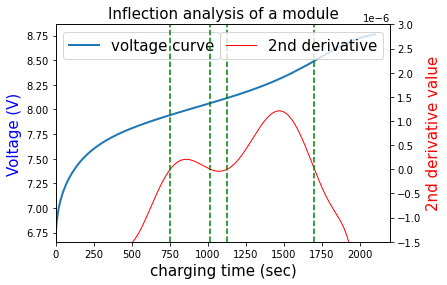

file =
 [-7.100e-02 -1.110e-01 -1.530e-01 -1.890e-01 -2.500e-01 -2.800e-01
 -2.990e-01 -3.210e-01  1.124e+03  2.058e+03]


In [41]:
'''Error_反曲點+弛豫分析(0817)'''
import os
import math
import numpy as np
import matplotlib.pyplot as plt

pts_adj = []

a = r'C:\Users\Chun-Po\Documents\Python Scripts\B&A to NTU\RMA_K_40000KM\T19C10003_B&A\J21T01799\M04.csv'
data = np.genfromtxt(a, dtype = None, delimiter = ',', skip_header = 0, filling_values = 0, usecols=np.arange(0,4), invalid_raise = False, encoding = 'latin-1')
[Row,Column] = data.shape
module = data[0,3]          # Module序號(身分識別)
dat_r = np.round(data[4:,2].astype(np.float64),1)     # 把'安培'四捨五入
# inflection analysis
A = np.where(dat_r == 6.5); a1 = A[0];
Cha = data[4:,0][a1].astype(np.float64);                    # Charge time;
print("Cha =" ,Cha);     '''檢查是否有跳號'''
vot = data[4:,1][a1].astype(np.float64);                    # Voltage
Dis = data[4:,0][a1[-1]+602:-1];                            # Discharge time                    
b = np.polyfit(Cha, vot, 10); y = np.poly1d(b); v = y(Cha);
dv1 = np.gradient(v, Cha); dv2 = np.gradient(dv1, Cha);
#print("反曲點的dV/dt =" ,dv1); 
pts = np.where(dv2[1:]*dv2[0:-1]<0)[0];
pyd1 = dv1[pts];                                    # dV/dt value of inflection points
n = math.ceil(len(pts)*0.5); pyt = np.empty((1,n), dtype = object);
if len(pts) == 0:
    ift = 2500
elif (len(pts)%2) == 0:                # 反曲點為偶數個
    for i in range(n):
        pyt[0,i] = pyd1[i*2+1]-pyd1[i*2]
    pos = np.argmax(pyt);
    ift = pts[pos*2]; ifv = vot[ift];
else:                                # 反曲點為奇數個
    for i in range(n):
        if Cha[-1]-180<len(a1):
            ptss = pts.tolist(); ptss.append(Cha[-1])     # # # 加入充電結束時的時間 # # #
        else:
            ptss = pts.tolist(); ptss.append(len(a1)-1); ptss = ptss+min(Cha)
        ptsss = np.array(ptss).astype(np.int64);
    print("反曲點位置(原) =" ,ptsss);     '''檢查是否超過IndexError'''
    for j in range(len(ptsss)):
        try:
            point = np.where(Cha == ptsss[j])[0][0]
        except:
            point = np.where(Cha == ptsss[j]-1)[0][0]
        pts_adj.append(point)
    print("反曲點位置(實) =" ,pts_adj)
    pyd1 = dv1[pts_adj];
    for k in range(n):
        pyt[0,k] = pyd1[k*2+1]-pyd1[k*2]
    pos = np.argmax(pyt);
    if dv1[pts[pos*2]]>0:
        ift = pts[pos*2]
    else:
        if len(pts) == 1:
            ift = 2500
        else:
            ift = pts[(pos-1)*2]
# Relaxation analysis                  
rx = np.where(abs(dat_r)<6);
# print("rx=",rx[0])
rxp1 = np.where(rx[0][1:]-rx[0][0:-1]>10)[0];     '''從>100調成>10,因應充電不足的modules'''
# print("rxp1=",rxp1)
rxp2 = np.hstack([rxp1[0]+1,rxp1[0]+1,rxp1[0]+10,rxp1[0]+30,rxp1[0]+60,rxp1[0]+180,rxp1[0]+300,rxp1[0]+420,rxp1[1]-1,-1]);     # [0,rxp1[0],rxp1[0]+1,rxp1[1],-1]
rxp3 = rx[0][rxp2];          # 挑rest period的起始時間(連續的)
rxp4 = [rxp3[0]-1,rxp3[1],rxp3[2],rxp3[3],rxp3[4],rxp3[5],rxp3[6],rxp3[7],rxp3[8]]
rxv = data[4:,1][rxp4].astype(np.float64);                    # Relaxation voltage
rx00sec = np.round(rxv[1]-rxv[0],3)     # 看歐姆極化
rx10sec = np.round(rxv[2]-rxv[0],3)     # 極化10s
rx30sec = np.round(rxv[3]-rxv[0],3)     # 極化30s
rx01min = np.round(rxv[4]-rxv[0],3)     # 看01極化
rx03min = np.round(rxv[5]-rxv[0],3)     # 看03極化
rx05min = np.round(rxv[6]-rxv[0],3)     # 看05極化
rx07min = np.round(rxv[7]-rxv[0],3)     # 看07極化
rx10min = np.round(rxv[8]-rxv[0],3)     # 看10極化
soh = rxp3[9]-rxp3[8]

fig, ax1 = plt.subplots() 
ax1.set_xlabel('charging time (sec)', fontsize=15) 
ax1.set_ylabel('Voltage (V)', color='blue', fontsize=15)
plt.title('Inflection analysis of a module', fontsize=15);
ax1.plot(Cha,vot, linewidth=2, label='voltage curve')
plt.legend(fontsize=15)
# Adding Twin Axes
ax2 = ax1.twinx() 
ax2.plot(Cha,dv2, color='r', linewidth=1, label='2nd derivative')
for j in range(len(pts)):
    plt.axvline(pts[j], color='g', linestyle='--')
# plt.xlim(0,2200); plt.ylim(-0.0001,0.01)     # 一微曲線
plt.xlim(0,2200); plt.ylim(-0.0000015,0.000003)     # 二微曲線
# plt.xlim(0,2200); plt.ylim(-0.0015,0.003)     # 二微曲線
# Add label & Show plot
plt.ylabel('2nd derivative value', color='r', fontsize=15);
plt.legend(fontsize=15); plt.show()

file = np.asarray([rx00sec,rx10sec,rx30sec,rx01min,rx03min,rx05min,rx07min,rx10min,ift,soh]).T
# print(type(rx00sec)); print(type(rx10sec)); print(type(rx30sec)); print(type(rx01min)); print(type(rx03min)); print(type(rx05min)); print(type(rx07min)); print(type(rx10min)); print(type(ift)); print(type(soh)); 
np.savetxt(r'C:\Users\Chun-Po\Documents\Python Scripts\儲存分析結果(數據)\Error_反+弛.csv',file,delimiter=',')
print("file =\n",file)


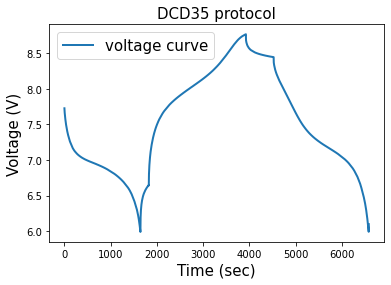

In [5]:
'''Error_反曲點+弛豫分析(0817)'''
import os
import math
import numpy as np
import matplotlib.pyplot as plt

a = r'C:\Users\Chun-Po\Documents\Python Scripts\B&A to NTU\RMA_K_40000KM\T19C10003_B&A\J21T01799\M04.csv'
data = np.genfromtxt(a, dtype = None, delimiter = ',', skip_header = 0, filling_values = 0, usecols=np.arange(0,4), invalid_raise = False, encoding = 'latin-1')
[Row,Column] = data.shape
volt = data[4:,1].astype(np.float64);                    # Voltage                 
time = range(len(volt));                    # Time

fig, ax1 = plt.subplots(+-) 
ax1.set_xlabel('Time (sec)', fontsize=15) 
ax1.set_ylabel('Voltage (V)', fontsize=15)
plt.title('DCD35 protocol', fontsize=15);
ax1.plot(time,volt, linewidth=2, label='voltage curve')
plt.legend(fontsize=15);
plt.savefig("DCD35 protocol" + ".jpg"); plt.show();     #save as jpg'''


In [ ]:
'''暫時不用_畫圖'''

for k in range(9):
    R = np.corrcoef(file[:,k], file[:,9])[0,1];
    R_sq = np.round(R*R,3);
print("R_r =\n" ,R_sq)

fig, ax1 = plt.subplots() 
ax1.set_xlabel('charging time (t)') 
ax1.set_ylabel('Voltage (V)') 
ax1.plot(Cha,vot, linewidth=2)
ax1.plot(Cha,v, linewidth=2) 
# Adding Twin Axes
ax2 = ax1.twinx() 
ax2.plot(Cha,dv1, linewidth=1)
for j in range(len(pts)):
    plt.axvline(pts[j], color='g', linestyle='--')
plt.xlim(0,2400); plt.ylim(0.0001,0.01)
# Add label & Show plot
plt.ylabel('dV/dt'); plt.show()
